In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#reading in files
aff = pd.read_csv('affiliations_data.csv', sep = ';')
jus = pd.read_csv('justification_data.csv', sep = ';')

In [47]:
#filling in nan values with 0's for easier handling
aff = aff.fillna(0)
jus = jus.fillna(0)

In [58]:
#removing id columns for increased readability
aff.drop(["list of 2012 ids", "list of 2021 ids"], axis = 1, inplace = True)
jus.drop("id", axis = 1, inplace = True) #do I also want to remove year?

## Affiliations

sorted dataframe by counter

stacked barchart of number of categories per category


In [29]:
count_list = []
for index in range(len(aff)):
    count_list.append(aff.iloc[index, 0] + aff.iloc[index, 1]) 

aff['Total count'] = count_list

#change column to sort by 2012 or 2021 exclusively
sort_aff = aff.sort_values(by=['Total count'], ascending = False)

sort_aff.head(10)

,Counter 2012,Counter 2021,Type,Country,Name,Total count
49,3.0,13.0,gov,China,"NSFC, National Natural Science Foundation of C...",16.0
206,7.0,7.0,gov,USA,NIH,14.0
235,3.0,3.0,uni,USA,University of North Carolina at Chapel Hill,6.0
46,0.0,5.0,gov,China,National Key Research and Development Program ...,5.0
236,4.0,1.0,uni,USA,University of Pennsylvania,5.0
58,2.0,3.0,uni,China,"Shanghai Jiao Tong University, China",5.0
209,2.0,3.0,gov,USA,NSF,5.0
29,0.0,5.0,uni,China,Chinese Academy of Sciences,5.0
197,2.0,3.0,uni,USA,Johns Hopkins University,5.0
84,1.0,3.0,gov,EU,European Commission,4.0


In [30]:
#dictionary with country as key and categories as list items in value

def create_country_cat(df):
    dic = {}
    for index in range(len(df)):
        country = df.iloc[index, 3]
        category = df.iloc[index, 2]
        if country not in dic:         
            dic[country] = [category] #add new empty list if country not in dic
        else: 
            dic[country].append(category)
    return dic


In [31]:
#[gov, uni, hosp, corp, other]
def count_country_cat(dic):
    count_dic = {}
    for key in dic.keys():
        count_list = [0,0,0,0,0]
        for category in dic.get(key):
            if category == 'gov':
                count_list[0]+=1
            elif category == 'uni':
                count_list[1]+=1
            elif category == 'hosp':
                count_list[2]+=1
            elif category == 'corp':
                count_list[3]+=1
            elif category == 'other':
                count_list[4]+=1
        count_dic[key] = count_list
    return count_dic

In [32]:
country_category = count_country_cat(create_country_cat(aff))


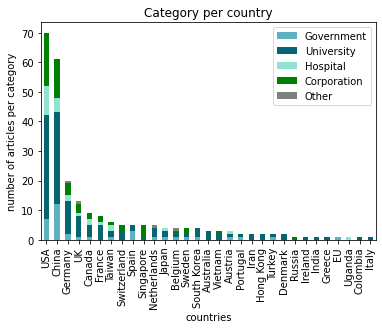

In [33]:
df = pd.DataFrame.from_dict(country_category)

row_names = {0:'Government', 1:'University', 2:'Hospital', 3: 'Corporation', 4:'Other'}

df.rename(index= row_names, inplace=True)

df = df.transpose()

#summing by the max value to be able to sort the table, then deleting column again
df['total'] = df.sum(axis=1)
df = df.sort_values(by = ['total'], ascending = False)
df.drop('total', axis=1, inplace=True)

color_dic = {'Government': '#5eb1bf', 'University': '#066570', 'Hospital': '#8FE3CF', 'Corporation': 'green', 'Other': 'grey'}

fig = df.plot(kind = 'bar', title = 'Category per country', stacked = True, color = color_dic )

fig.set_ylabel("number of articles per category")
fig.set_xlabel("countries")

#want to rotate the xticks, but currently results in overlapping due to different lengths of names
#being centered
#would need to access ax, using fig, ax = plt.subplots() to plot

#plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
#plt.xticks(rotation = 45)

plt.savefig('category per country', bbox_inches='tight')

This works, but is basically unreadable.. Everything is too squished together. So need a better representation! Also I barely use the other category - can I remove it?

## Justification

barchart of category and their counts

counter for diseases column

counter for body part

sorted list of disease/task per body part

Need to check if this does everything correctly now that I've updated with full dataset - does it split stuff like I want it to?

In [37]:
jus.head()

,year,type,disease,body part,Zhou category,task,id
0,2012,sci,0,all,0,surgery,4
1,2012,dis,glaucoma,eyes,0,0,7
2,2012,nov,cancer,lungs,chest,0,9
3,2012,sci,alzheimers,brain,neuro,0,10
4,2012,sci,0,cell,microscopy,metabolic response of cells,13


In [36]:
def create_dic_of_counts(df, column):
    dic = {}
    option_list= []
    for element in df.iloc[:, column]:
        if element != 0:
            if ',' in element: 
                multiples = element.split(", ")
                for option in multiples:
                    option_list.append(option)
            else:
                option_list.append(element)
    for option in option_list:
        if option not in dic:
            dic[option] = 1
        else:
            dic[option] = dic.get(option) + 1 
    return dic

In [50]:
cat = create_dic_of_counts(jus, 1)
disease = create_dic_of_counts(jus, 2)
body_part = create_dic_of_counts(jus, 3)
zhou_cat = create_dic_of_counts(jus, 4)

In [56]:
disease

{'glaucoma ': 1,
 'cancer': 34,
 'alzheimers': 6,
 'mild cognitive impairment': 2,
 'autism': 3,
 'multiple sclerosis': 1,
 'coronary artery disease': 2,
 "parkinson's disease": 3,
 'tuberculosis': 1,
 'verebral body fractures': 1,
 'schizophrenia': 1,
 'bipolar': 1,
 'Alzheimers': 1,
 'intercranial hemorrhage': 2,
 'covid': 3,
 'epilepsy': 1,
 'liver steatosis': 1,
 "crohn's disease": 1,
 'lumbar degeneration disease': 1,
 'ulcerative colitis': 1,
 'pneumothorax': 1,
 'nonalcoholic fatty liver disease': 1,
 'rare diseases': 1,
 'brain disease': 1,
 'neurodegenerative disorders': 1,
 'adolescent idopathic scoliosis': 1,
 'lesion': 1,
 'Subjective cognitive decline': 1,
 'lung disease': 1,
 'major depression disorder': 1,
 'pneumonia': 1,
 'skin lesion diagnosis': 1,
 'diabetic retinopathy': 1,
 'gastrointestinal abnormalities': 1,
 'tumor': 1}

In [51]:
df = pd.DataFrame.from_dict([cat])

column_names = {'sci':'Science based', 'dis':'Disease based', 'nov':'Novel approach', 
                'hc': 'Improved healthcare'}

df.rename(columns= column_names, inplace=True)

In [52]:
df

,Science based,Disease based,Novel approach,Improved healthcare
0,78,37,26,22


In [53]:
sort_jus = jus.sort_values(by = ['body part', 'disease'])

In [54]:
sort_jus

,year,type,disease,body part,Zhou category,task,id
0,2012,sci,0,all,0,surgery,4
16,2012,"nov, sci",0,all,0,"detect regional differences in images, for dif...",62
23,2012,sci,0,all,0,"surgery, robotic",163
83,2021,"nov, sci",0,all,?,universal lesion detection,266
108,2021,"dis, sci",cancer,all,?,0,257
...,...,...,...,...,...,...,...
48,2021,sci,0,spine,abdomen,evaluation of spinal bone lesions,280
74,2021,dis,adolescent idopathic scoliosis,spine,abdomen,0,288
55,2021,"sci, hc",lumbar degeneration disease,spine,abdomen,0,82
33,2012,"sci, dis",verebral body fractures,spine,abdomen,0,235


Following code gives me some issues!

In [55]:
body_dic={}
for index in range(len(jus)):
    #initialising the dictionary with an empty string
    if jus.iloc[index, 3] != 0:
        if jus.iloc[index, 3] not in body_dic:
            body_dic[jus.iloc[index, 3]] = ''  
        
for index in range(len(jus)):
    check_list = body_dic.get(jus.iloc[index, 3])
    if jus.iloc[index, 2] != 0 and jus.iloc[index, 2] not in check_list:
        #only adding the disease once
        check_list = check_list + ", " +jus.iloc[index, 2]
        body_dic[jus.iloc[index, 3]] = check_list
    elif jus.iloc[index, 2] == 0:
        body_dic[jus.iloc[index, 3]] = body_dic.get(jus.iloc[index, 3])+ ", " +jus.iloc[index, 4]

TypeError: can only concatenate str (not "int") to str

In [160]:
body_dic

{'all': ', surgery, detect regional differences in images, for different diseases, surgery robotic',
 'eyes': ', glaucoma , location of foveola for different diseases',
 'lungs': ', cancer, tuberculosis',
 'brain': ", alzheimers, cancer, measuring nerve fibers, population based pattern recognition brain in particular, mild cognitive impairment, autism, multiple sclerosis, neonate brain mapping, different applications, parkinson's disease",
 'cell': ', metabolic response of cells, cell death event detection, cell feature analysis, cell detection, vesicle fusion/undocking, phase contrast microscopy',
 'prostate': ', cancer',
 'skin': ', cancer',
 'breast': ', cancer',
 'heart': ', capturing morphological changes over time, coronary artery disease',
 'spine': ', verebral body fractures',
 'colorectal': ', cancer'}